In [1]:
#import dependencies
import os
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.applications.vgg16 import (VGG16, preprocess_input, decode_predictions)
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
#import pre-trained model without top layer
trained_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3))

In [3]:
#freeze the layers to prevent re-training except for the last 4 layers
for layer in trained_model.layers[:-4]:
    layer.trainable = False

In [4]:
#check if the last 4 layers are trainable
for layer in trained_model.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001CE8409F198> False
<keras.layers.convolutional.Conv2D object at 0x000001CE8409F4A8> False
<keras.layers.convolutional.Conv2D object at 0x000001CE8404DA58> False
<keras.layers.pooling.MaxPooling2D object at 0x000001CE83C7EF60> False
<keras.layers.convolutional.Conv2D object at 0x000001CE83C8A550> False
<keras.layers.convolutional.Conv2D object at 0x000001CE840C4B38> False
<keras.layers.pooling.MaxPooling2D object at 0x000001CE840FBBE0> False
<keras.layers.convolutional.Conv2D object at 0x000001CE8410C9E8> False
<keras.layers.convolutional.Conv2D object at 0x000001CE8411FEF0> False
<keras.layers.convolutional.Conv2D object at 0x000001CE84131FD0> False
<keras.layers.pooling.MaxPooling2D object at 0x000001CE84159CF8> False
<keras.layers.convolutional.Conv2D object at 0x000001CE8416AB00> False
<keras.layers.convolutional.Conv2D object at 0x000001CE8417BD30> False
<keras.layers.convolutional.Conv2D object at 0x000001CE8418C5C0> False
<ker

In [5]:
#based on pre-trained model, add new layers and output layer to train for new dataset
my_model = models.Sequential()
my_model.add(trained_model)
my_model.add(layers.Flatten())
my_model.add(layers.Dense(256, activation='relu'))
my_model.add(layers.Dropout(0.5))
my_model.add(layers.Dense(5, activation='softmax'))

In [6]:
#show new model summary
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


In [7]:
#preprocess image data
#since the number of pictures in the training dataset is small, use data augumentation to make the most of training pictures
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
#define training batches and paths of training dataset and validation dataset
training_batchsize = 50
validation_batchsize = 10
training_path = "Data/ImageNet_images/training"
validation_path = "Data/ImageNet_images/validation"
image_size = (224,224)

In [9]:
#get training data and validation data
train_generator = train_datagen.flow_from_directory(
        training_path,
        target_size=image_size,
        batch_size=training_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=image_size,
        batch_size=validation_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 5765 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [10]:
# Compile the model
my_model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-5),
            metrics=['acc'])
#my_model.compile(loss='categorical_crossentropy',
 #            optimizer=optimizers.Adamax(lr=1e-5),
  #          metrics=['acc'])
#my_model.compile(loss='categorical_crossentropy',
 #             optimizer=optimizers.Nadam(lr=1e-5),
  #            metrics=['acc'])

# Train the model
history = my_model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=2)
 
# Save the model
my_model.save('my_model_final.h5')

Epoch 1/30
 - 3771s - loss: 1.0196 - acc: 0.6008 - val_loss: 0.4730 - val_acc: 0.8140
Epoch 2/30
 - 3714s - loss: 0.5156 - acc: 0.8116 - val_loss: 0.3179 - val_acc: 0.8740
Epoch 3/30
 - 3701s - loss: 0.3933 - acc: 0.8637 - val_loss: 0.2663 - val_acc: 0.8860
Epoch 4/30
 - 3698s - loss: 0.3233 - acc: 0.8898 - val_loss: 0.2568 - val_acc: 0.8980
Epoch 5/30
 - 3707s - loss: 0.2867 - acc: 0.9002 - val_loss: 0.2239 - val_acc: 0.9140
Epoch 6/30
 - 3700s - loss: 0.2597 - acc: 0.9071 - val_loss: 0.2022 - val_acc: 0.9260
Epoch 7/30
 - 3708s - loss: 0.2285 - acc: 0.9234 - val_loss: 0.1992 - val_acc: 0.9260
Epoch 8/30
 - 3708s - loss: 0.2144 - acc: 0.9203 - val_loss: 0.1953 - val_acc: 0.9280
Epoch 9/30
 - 3702s - loss: 0.1956 - acc: 0.9287 - val_loss: 0.2254 - val_acc: 0.9240
Epoch 10/30
 - 3684s - loss: 0.1833 - acc: 0.9325 - val_loss: 0.1894 - val_acc: 0.9340
Epoch 11/30
 - 3681s - loss: 0.1761 - acc: 0.9382 - val_loss: 0.1746 - val_acc: 0.9380
Epoch 12/30
 - 3743s - loss: 0.1557 - acc: 0.9448 - 

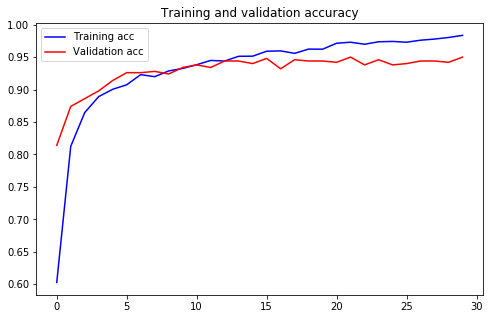

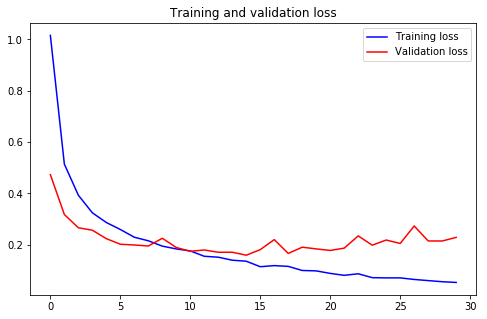

In [11]:
#plot training and validation accuracy, training and validation loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure(figsize=(8,5)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [12]:
#get the predicted flower class from the new model
predicted_class = my_model.predict_generator(validation_generator)
#for each picture, the prediction is a list of probabilities of each class.  Identify the max probability and return its
#index which represents the index of class labels in the model
predicted_class = np.argmax(predicted_class, axis=1)

In [13]:
#get the actual flower class from the validation data
actual_class = validation_generator.classes

In [14]:
#create confusion matrix
cnf_matrix = confusion_matrix(actual_class, predicted_class)

In [15]:
#define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix',fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #define a threshhold to change font color so that dark background will have light colored text
    threshold = cm.max() / 2.
    #use for loop to plot text to the confusion matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            #text is plotted from left to right, so use (j,i), not (i,j)
            plt.text(j,i,cm[i,j],horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")
    plt.ylabel('Actual Flower Class')
    plt.xlabel('Predicted Flower Class')

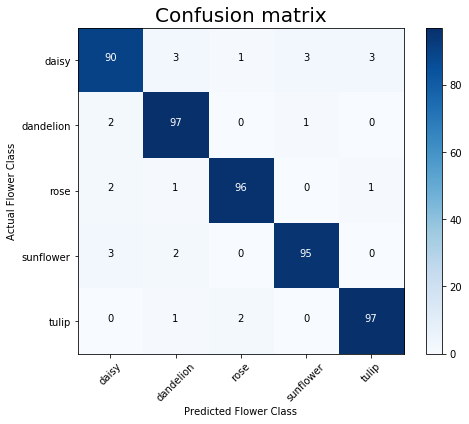

In [16]:
#plot the confusion matrix with class labels defined
plot_confusion_matrix(cnf_matrix, classes=["daisy","dandelion","rose","sunflower","tulip"])
plt.show()